### Step 1. Load Your Data into a Jupyter Notebook

In [3]:
import pandas as pd

In [26]:
data =(r'C:\Users\shiv8\OneDrive\Desktop\datafoltz\ViewingActivity.csv')

In [27]:
df = pd.read_csv(data)

Now, let's do a quick preview of the data to make sure everything looks correct. We'll start with df.shape, which will tell us the number of rows and columns in the dataframe we've just created.

In [28]:
df.shape

(5445, 10)

That result means we have 5445 rows and 10 columns. Now, let's see what it looks like by previewing the first few rows of data using df.head().

To maintain some privacy, I'll be adding the additional argument 1 inside the .head() parentheses so that only a single row prints in this blog post. In your own analysis, however, you can use the default .head() to print the first five rows

In [29]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ninja,11-11-2020 14:51,00:19:41,NaN,Friends: Season 4: The One with the Embryos (E...,NaN,Chrome PC (Cadmium),00:20:08,00:20:08,AE (United Arab Emirates)
1,The Kehshiba,11-11-2020 13:57,00:01:11,NaN,Suits: Season 1: Rules of the Game (Episode 11),NaN,Apple iPhone XR,00:13:34,00:13:34,IN (India)
2,The Kehshiba,11-11-2020 12:03,00:13:26,NaN,Suits: Season 1: Rules of the Game (Episode 11),NaN,Apple iPhone XR,00:13:52,Not latest view,IN (India)
3,The Kehshiba,11-11-2020 11:43,00:20:25,NaN,Suits: Season 1: The Shelf Life (Episode 10),NaN,Apple iPhone XR,00:42:03,00:42:03,IN (India)
4,The Jasbir,11-11-2020 11:08,00:11:19,Autoplayed: user action: Unspecified;,Transformers: Robots in Disguise: Season 1: Ou...,NaN,FireTV Stick 2016,00:11:08,00:11:08,IN (India)


### Step 2.Preparing the Data for Analysis
Before we can do our number-crunching, let's clean up this data a bit to make it easier to work with.

Dropping Unnecessary Columns (Optional) First, we'll start by dropping the columns we're not planning to use. This is totally optional, and it's probably not a good idea for large-scale or ongoing projects. But for a small-scale personal project like this, it can be nice to work with a dataframe that includes only columns we're actually using.

In this case, we're planning to analyze how much and when I've watched The Office, so we'll need to keep the Start Time, Duration, and Title columns. Everything else can go.

To do this, we'll use df.drop() and pass it two arguments:

A list of the columns we'd like to drop axis=1, which tells pandas to drop columns Here's what it looks like:

In [30]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(5)

,Start Time,Duration,Title
0,11-11-2020 14:51,00:19:41,Friends: Season 4: The One with the Embryos (E...
1,11-11-2020 13:57,00:01:11,Suits: Season 1: Rules of the Game (Episode 11)
2,11-11-2020 12:03,00:13:26,Suits: Season 1: Rules of the Game (Episode 11)
3,11-11-2020 11:43,00:20:25,Suits: Season 1: The Shelf Life (Episode 10)
4,11-11-2020 11:08,00:11:19,Transformers: Robots in Disguise: Season 1: Ou...


Great! Next, let's work with the time data.

Converting Strings to Datetime and Timedelta in Pandas The data in our two time-related columns certainly looks correct, but what format is this data actually being stored in? We can use df.dtypes to get a quick list of the data types for each column in our dataframe:

In [31]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

As we can see here, all three columns are stored as object, which means they're strings. That's fine for the Title column, but we need to change the two time-related columns into the correct datatypes before we can work with them.

Specifically, we need to do the following:

Convert Start Time to datetime (a data and time format pandas can understand and perform calculations with) Convert Start Time from UTC to our local timezone Convert Duration to timedelta (a time duration format pandas can understand and perform calculations with) So, let's approach those tasks in that order, starting with converting Start Time to datetime using pandas's pd.to_datetime().

We'll also add the optional argument utc=True so that our datetime data has the UTC timezone attached to it. This is important, since we'll need to convert it to a different timezone in the next step.

We'll then run df.dtypes again just to confirm that this has worked as expected.

In [32]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

Now I've got that column in the correct format, it's time to change the timezone so that when I do my  analysis, I'll see everything in local time.

I can  also convert datetimes to any timezone using the .tz_convert() and passing it an argument with the string for the timezone we want to convert to. In this case, that's 'US/Eastern'. To find your specific timezone, here's [a handy reference of TZ timezone options](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones).

The tricky bit here is that I can only use .tz_convert() on a DatetimeIndex, so I need to set our Start Time column as the index using set_index() before I perform the conversion.
and then  using  reset_index() to turn it back into a regular column afterwards. Depending on the preference and goals, this may not be necessary, but for the purposes of simplicity here, I'll try to do my analysis with all of our data in columns rather than having some of it as the index.

Putting all of that together looks like this:

In [33]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2020-11-11 09:51:00-05:00,00:19:41,Friends: Season 4: The One with the Embryos (E...


Now, let's deal with the  Duration column. This is, as the name suggests, a duration — a measure of a length of time. So, rather than converting it to a datetime, lets  convert it to a timedelta, which is a measure of time duration that pandas understands.

This is very similar to what I did when converting the Start Time column. I'll just need to use pd.to_timedelta() and pass it the column I want to convert as an argument.

Once again, I'll use df.dtypes to quickly check my  work.

In [34]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

Perfect! But I've got one more data preparation task to handle: filtering that Title column so that I can analyze only views of 'ARROW'

### Step 3. Filtering Strings by Substring in pandas Using str.contains

Filtering Strings by Substring in pandas Using str.contains There are many ways I could approach filtering The Arrow views.  here, though, I am going to create a new dataframe called Arrow and populate it only with rows where the Title column contains 'Arrow'.

I can do this using str.contains(), giving it two arguments:

'Arrow', which is the substring I am using to pick out only episodes of The Arrow. regex=False, which tells the function that the previous argument is a string and not a regular expression. Here's what it looks like in practice

In [35]:
# create a new dataframe called office that that takes from df
# only the rows in which the Title column contains 'The Office (U.S.)'
Arrow = df[df['Title'].str.contains('Arrow', regex=False)]
Arrow


,Start Time,Duration,Title
72,2020-10-11 04:41:00-04:00,00:00:02,Arrow: Season 6: Tribute (Episode 2)
78,2020-10-11 03:20:00-04:00,00:09:48,Arrow: Season 6: The Fallout (Episode 1)
79,2020-10-11 03:19:00-04:00,00:00:38,Arrow: Season 6: The Fallout (Episode 1)
83,2020-10-11 02:23:00-04:00,00:30:24,Arrow: Season 6: The Fallout (Episode 1)
88,2020-10-11 01:13:00-04:00,00:41:11,Arrow: Season 5: Lian Yu (Episode 23)
...,...,...,...
1459,2020-03-10 15:48:00-04:00,00:02:21,Arrow: Season 1: Honor Thy Father (Episode 2)
1460,2020-03-10 15:00:00-04:00,00:41:59,Arrow: Season 1: Pilot (Episode 1)
1461,2020-03-10 15:00:00-04:00,00:00:06,Arrow: Season 7_hook_primary_16x9
1496,2020-02-10 13:08:00-05:00,00:00:17,Arrow: Season 1: Pilot (Episode 1)


Once  done this, there are a few ways I  could double-check my work. For example, I could use Arrow.sample(20) to inspect a random ten rows of our new Arrow dataframe. If all twenty rows contained Arrow episodes, I could be pretty confident things worked as expected.
Though, I'll run Arrow.shape to check the size of the new dataframe. Since this dataframe should contain only my views of The Office, I should expect it to have significantly fewer rows than the 5000+ row df dataset.

In [36]:
Arrow.shape

(252, 3)

### Step 4.Filtering Out Short Durations Using Timedelta

Filtering Out Short Durations Using Timedelta Before we really dig in and analyze, we should probably take one final step. I noticed in the data exploration that when something like an episode preview auto-plays on the homepage, it counts as a view in the data.

However, watching two seconds of a trailer as I scroll past isn't the same as actually watching an episode! So let's filter Arrow dataframe down a little bit further by limiting it to only rows where the Duration value is greater than one minute. This should effectively count the watchtime for partially watched episodes, while filtering out those short, unavoidable "preview" views.

Again, office.head() or office.sample() would be good ways to check my work here.

In [37]:
Arrow = Arrow[(Arrow['Duration'] > '0 days 00:01:00')]
Arrow.shape

(219, 3)

In [38]:
Arrow['Duration'].sum()

Timedelta('3 days 06:36:43')

In [39]:
Arrow

,Start Time,Duration,Title
78,2020-10-11 03:20:00-04:00,00:09:48,Arrow: Season 6: The Fallout (Episode 1)
83,2020-10-11 02:23:00-04:00,00:30:24,Arrow: Season 6: The Fallout (Episode 1)
88,2020-10-11 01:13:00-04:00,00:41:11,Arrow: Season 5: Lian Yu (Episode 23)
90,2020-10-11 01:04:00-04:00,00:08:47,Arrow: Season 5: Missing (Episode 22)
115,2020-09-11 11:29:00-04:00,00:32:11,Arrow: Season 5: Missing (Episode 22)
...,...,...,...
1457,2020-03-10 16:47:00-04:00,00:23:16,Arrow: Season 1: Honor Thy Father (Episode 2)
1458,2020-03-10 16:19:00-04:00,00:15:18,Arrow: Season 1: Honor Thy Father (Episode 2)
1459,2020-03-10 15:48:00-04:00,00:02:21,Arrow: Season 1: Honor Thy Father (Episode 2)
1460,2020-03-10 15:00:00-04:00,00:41:59,Arrow: Season 1: Pilot (Episode 1)


### Step 5.Analyzing the Data

How much time have I spent watching The Arrow? First, let's answer the big question: How much time have been  spent watching Arrow?

Since I've already got the Duration column in a format that pandas can compute, answering this question is quite straightforward. I can use .sum() to add up the total duration

In [40]:
Arrow['Duration'].sum()

Timedelta('3 days 06:36:43')

So,  total of 3 days, 6 hours, 36 minutes and 43 seconds have been spent watching Arrow on Netflix. That is . . . a lot.

In my defense, that's over the course of a decade, and a good percentage of that time wasn't spent actively watching! When I'm doing brain-off work, working out, playing old video games, etc., I'll often turn on as a kind of background noise that I can zone in and out of. I also used to use it as a kind of white noise while falling asleep.

But I am  not here to make excuses for my terrible lifestyle choices! Now that I've answered the big question, let's dig a little deeper into my Arrow-viewing habits:

When do I watch Arrow? Let's answer this question in two different ways:

On which days of the week have I watched the most Arrow episodes? During which hours of the day do I most often start Arrow episodes? I'll start with a little prep work that'll make these tasks a little more straightforward: creating new columns for "weekday" and "hour".

I can use the .dt.weekday and .dt.hour methods on the Start Time column to do this and assign the results to new columns named weekday and hour:

In [41]:
Arrow['weekday'] = Arrow['Start Time'].dt.weekday
Arrow['hour'] = Arrow['Start Time'].dt.hour

# check to make sure the columns were added correctly
Arrow.head(5)

<ipython-input-41-d71c02484491>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arrow['weekday'] = Arrow['Start Time'].dt.weekday
<ipython-input-41-d71c02484491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arrow['hour'] = Arrow['Start Time'].dt.hour


,Start Time,Duration,Title,weekday,hour
78,2020-10-11 03:20:00-04:00,00:09:48,Arrow: Season 6: The Fallout (Episode 1),6,3
83,2020-10-11 02:23:00-04:00,00:30:24,Arrow: Season 6: The Fallout (Episode 1),6,2
88,2020-10-11 01:13:00-04:00,00:41:11,Arrow: Season 5: Lian Yu (Episode 23),6,1
90,2020-10-11 01:04:00-04:00,00:08:47,Arrow: Season 5: Missing (Episode 22),6,1
115,2020-09-11 11:29:00-04:00,00:32:11,Arrow: Season 5: Missing (Episode 22),4,11


Now, let's do a little analysis! These results will be easier to understand visually, so I'll start by using the %matplotlib inline magic to make our charts show up in  Jupyter notebook. Then, I'll import matplotlib

In [42]:
%matplotlib inline
import matplotlib

Now, let's plot a chart of my viewing habits by day of the week. To do this, we'll need to work through a few steps:

Tell pandas the order we want to chart the days in using pd.Categorical — by default, it will plot them in descending order based on the number of episodes watched on each day, but when looking at a graph, it'll be more intuitive to see the data in Monday-Sunday order. Count the number of episodes I viewed on each day in total Sort and plot the data (There are also many other ways we could approach analyzing and visualizing this data.

Let's see how it looks step by step:

<ipython-input-43-7e37a8a440bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arrow['weekday'] = pd.Categorical(Arrow['weekday'], categories=


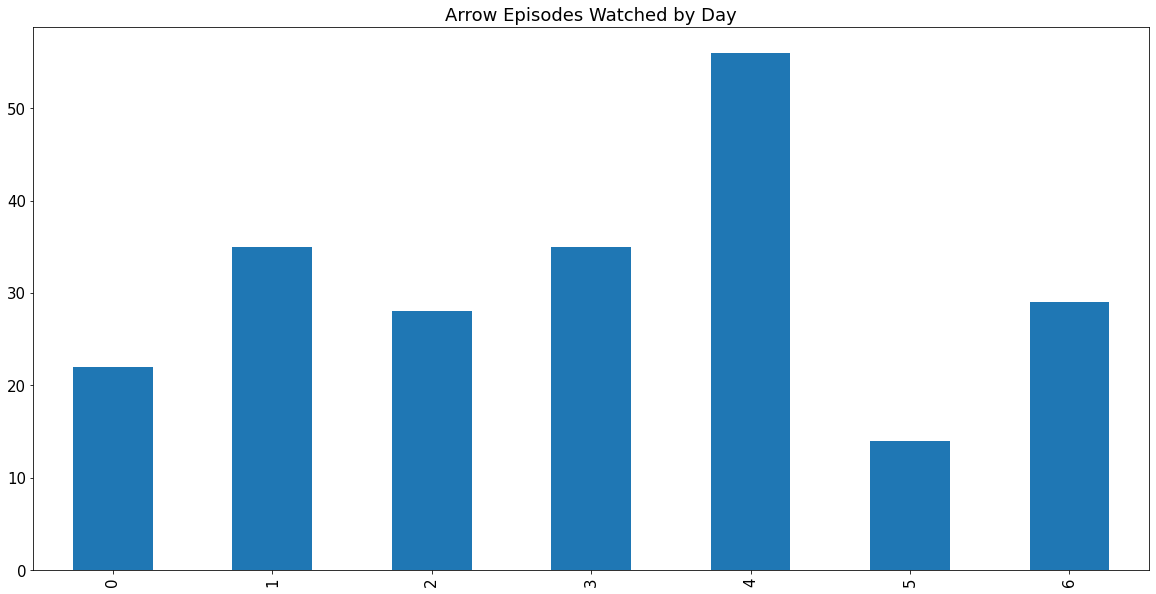

In [43]:
# set our categorical and define the order so the days are plotted Monday-Sunday
Arrow['weekday'] = pd.Categorical(Arrow['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create Arrow_by_day and count the rows for each weekday, assigning the result to that variable
Arrow_by_day = Arrow['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
Arrow_by_day = Arrow_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 15})

# plot Arrow_by_day as a bar chart with the listed size and title
Arrow_by_day.plot(kind='bar', figsize=(20,10), title='Arrow Episodes Watched by Day')

As I can see, I've actually tended to watch The Arrow more during first and last  day of  week

Now, let's take a look at the same data by hour. The process here is very similar to what we just did above:

<ipython-input-44-96ce5771c5c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arrow['hour'] = pd.Categorical(Arrow['hour'], categories=


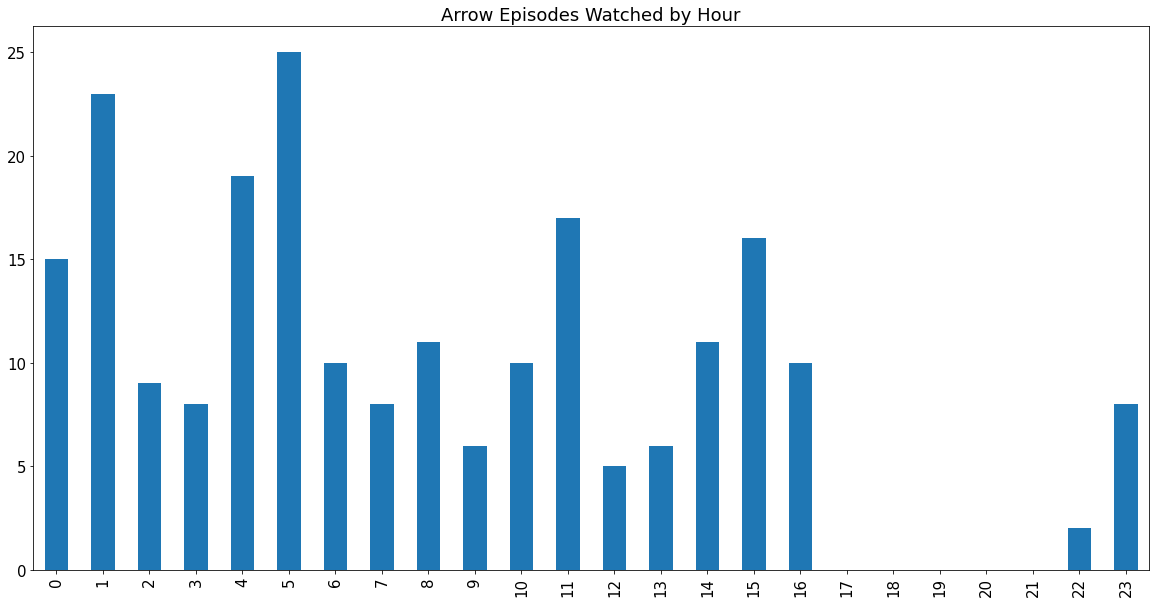

In [44]:
# set our categorical and define the order so the hours are plotted 0-23
Arrow['hour'] = pd.Categorical(Arrow['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
Arrow_by_hour = Arrow['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
Arrow_by_hour = Arrow_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
Arrow_by_hour.plot(kind='bar', figsize=(20,10), title='Arrow Episodes Watched by Hour')

From the data, it looks like 1 a.m. and 5 a.m. were the hours during which I most often started episodes of Arrow. This is due to my (unhealthy) habit of using the show as white noise while going to sleep — many of these episodes probably auto-played while I was already asleep!

Outside of that, it's no surprise to see that most of my viewing happened  midnight onwards till 5 am and afterthat pace is average uptill 4pm.
